# Youtube Sentimental Analysis

## Import necessary libraries

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df_comments = pd.read_csv('/content/UScomments.csv', on_bad_lines='skip', quoting=csv.QUOTE_NONE, encoding='utf-8', low_memory=False)
df_comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,"""Logan Paul it's yo big day ‼️‼️‼️""",4,0
1,XpVt6Z1Gjjo,"""I've been following you from the start of you...",3,0
2,XpVt6Z1Gjjo,"""Say hi to Kong and maverick for me""",3,0
3,XpVt6Z1Gjjo,"""MY FAN . attendance""",3,0
4,XpVt6Z1Gjjo,"""trending 😉""",3,0


## Lets find out missing values in your data

In [32]:
df_comments.isna().sum()

video_id          0
comment_text      6
likes           108
replies         110
dtype: int64

## Drop missing values as we have very few & update datafraem as well..

In [34]:
df_comments.dropna(inplace=True)
df_comments.isna().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

## 1.How to perform Sentiment Analysis

In short , Sentiment analysis is all about analyszing sentiments of Users. Lets perform sentiment analysis using TextBlob which is a NLP library built on top of NLTK )..

In [39]:
!pip install textblob
from textblob import TextBlob

TextBlob('Logan Paul its yo big day ‼️‼️‼️').sentiment.polarity

0.0

In [40]:
df_comments.shape

(147461, 4)

In [37]:
df = df_comments[0:1000]

polarity = []
for comment in df_comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

print(polarity[0:50])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, -0.13571428571428573, 0.0, -0.023333333333333352, 0.5, 0.0, 0.8, 0.0, 0.25, -0.8, 0.0, 0.0, 0.0, 0.375, 0.0, 0.0, 0.5, -0.04999999999999999, 0.34448051948051944, 0.5, 0.6, 0.0, 0.0, -0.30625, -0.36458333333333337, 0.5, 0.012499999999999997, 0.11904761904761905, 0.16666666666666666, 0.0, -0.4, -0.125, -0.07142857142857142, 0.0, 0.35, 0.0, -0.03415584415584416, -0.4, 0.8, 0.0, 0.0, 0.0]


In [41]:
df_comments['polarity'] = polarity
df_comments.head(12)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,"""Logan Paul it's yo big day ‼️‼️‼️""",4,0,0.000000
1,XpVt6Z1Gjjo,"""I've been following you from the start of you...",3,0,0.000000
2,XpVt6Z1Gjjo,"""Say hi to Kong and maverick for me""",3,0,0.000000
3,XpVt6Z1Gjjo,"""MY FAN . attendance""",3,0,0.000000
4,XpVt6Z1Gjjo,"""trending 😉""",3,0,0.000000
5,XpVt6Z1Gjjo,"""#1 on trending AYYEEEEE""",3,0,0.000000
6,XpVt6Z1Gjjo,"""The end though 😭👍🏻❤️""",4,0,0.000000
7,XpVt6Z1Gjjo,"""#1 trending!!!!!!!!!""",3,0,0.000000
8,XpVt6Z1Gjjo,"""Happy one year vlogaversary""",3,0,0.800000
9,XpVt6Z1Gjjo,"""You and your shit brother may have single han...",0,0,-0.135714


### Try it :

a) perform sentiment analysis using NLTK Vader SentimentAnalyzer.

b) perform sentiment analysis using spacy.

## 2.. Wordcloud Analysis of your data

In [43]:
positive_comments = df_comments[df_comments['polarity'] == 1]
negative_comments = df_comments[df_comments['polarity'] == -1]
negative_comments.head(2)

,video_id,comment_text,likes,replies,polarity
419,8wNr-NQImFg,"""BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUS...",0,0,-1.0
454,8wNr-NQImFg,"""Well… The brain surgeon Ben Carson just prove...",0,0,-1.0


In [44]:
#!pip install wordcloud

from wordcloud import WordCloud , STOPWORDS

negative_comments['comment_text']

419       "BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUS...
454       "Well… The brain surgeon Ben Carson just prove...
778            "WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!"
1136                                       "WTF BRUH!!!!!!"
1156                      "cheeseus christ thats insane!!!"
                                ...                        
146958    "Worst book? This isn't The Catcher in the Rye...
146971                   "Worst book ever? \nHold my beer."
146979    "This will be the worst book I will ever read ...
147494    "Did she lose her b00bs in a horrible accident...
147514    "This looks terrible. She looks like she can't...
Name: comment_text, Length: 794, dtype: object

In [46]:
total_comments = ' '.join(negative_comments['comment_text'])
total_comments[0:100]

'"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY\'S RITUAL ABUSE ON CHILDREN!!!!!!!'

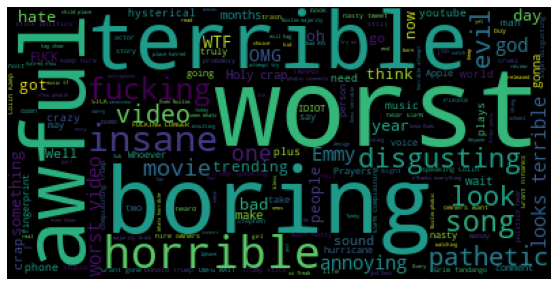

In [48]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off');

# Conclusion:
Users are emphasizing more on Terrible , worst ,horrible ,boring , disgusting etc..

### Try it:
a. Extract positive comments using query() function of pandas.

b .Extract positive comments using where() function of numpy.

### Lets perform EDA for the Negative sentences

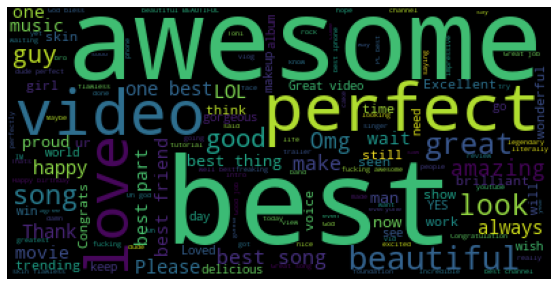

In [50]:
total_comments2 = ' '.join(positive_comments['comment_text'])
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments2)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off');

## 3..Perform Emoji's Analysis

In [51]:
!pip install emoji

import emoji

df_comments.head(14)

     |████████████████████████████████| 175 kB 5.0 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=4a729d4389937016608c418eb3f0ff752e054b7e7fe6d76d2715fa64616ce3fe
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,"""Logan Paul it's yo big day ‼️‼️‼️""",4,0,0.000000
1,XpVt6Z1Gjjo,"""I've been following you from the start of you...",3,0,0.000000
2,XpVt6Z1Gjjo,"""Say hi to Kong and maverick for me""",3,0,0.000000
3,XpVt6Z1Gjjo,"""MY FAN . attendance""",3,0,0.000000
4,XpVt6Z1Gjjo,"""trending 😉""",3,0,0.000000
5,XpVt6Z1Gjjo,"""#1 on trending AYYEEEEE""",3,0,0.000000
6,XpVt6Z1Gjjo,"""The end though 😭👍🏻❤️""",4,0,0.000000
7,XpVt6Z1Gjjo,"""#1 trending!!!!!!!!!""",3,0,0.000000
8,XpVt6Z1Gjjo,"""Happy one year vlogaversary""",3,0,0.800000
9,XpVt6Z1Gjjo,"""You and your shit brother may have single han...",0,0,-0.135714


In [52]:
print('\U0001F600')

😀


### Lets extract emoji from below comment

In [53]:
comment = 'trending 😉'
comment

'trending 😉'

In [55]:
[c for c in comment if c in emoji.EMOJI_DATA]

['😉']

In [57]:
emoji_list=[]
for comment in df_comments['comment_text']:
    for char in comment:
        if char in emoji.EMOJI_DATA:
            emoji_list.append(char)
          
len(emoji_list)

65456

In [58]:
emoji_list[:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

### Now we have to compute frequencies of each & every emojis..

In [59]:
from collections import Counter

Counter(emoji_list).most_common(10)

[('😂', 8442),
 ('❤', 6925),
 ('😍', 6435),
 ('😬', 3143),
 ('😭', 1957),
 ('🔥', 1847),
 ('👏', 1498),
 ('💕', 1344),
 ('👍', 1285),
 ('😘', 1137)]

In [61]:
emojis = [Counter(emoji_list).most_common(10)[emoji][0] for emoji in range(10)]
emojis

['😂', '❤', '😍', '😬', '😭', '🔥', '👏', '💕', '👍', '😘']

In [63]:
frequencies = [Counter(emoji_list).most_common(10)[emoji][1] for emoji in range(10)]
frequencies

[8442, 6925, 6435, 3143, 1957, 1847, 1498, 1344, 1285, 1137]

In [65]:
!pip install plotly

import plotly.graph_objs as go
from plotly.offline import iplot

trace = go.Bar(x=emojis, y=frequencies)
iplot([trace])

### Try it :
Once u have list of emojis , how to create a dictionary like : 
```
{'emoji':'frequency of emoji'}
```        
1. Code completely from scratch (by iterating over the list and counting frequency)

2 Using list in-built count function
3.Using dictionary in-buult get function

## 4. Collect Entire data of Youtube

In [ ]:
import os

path = r'F:\Data Analysis_projects\Youtube\additional_data'

files = os.listdir(path)
files
files_csv = [files[i] for i in range(0,len(files),2)]
files_csv

In [ ]:
full_df = pd.DataFrame()

for file in files_csv:
    current_df = pd.read_csv(path + '/' + file, encoding='iso-8859-1', error_bad_lines=False)
    current_df['country'] = file.split('.')[0][0:2]
    full_df = pd.concat([full_df, current_df])

full_df.head(4)  

In [ ]:
full_df.shape

(375942, 17)

In [ ]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [ ]:
cat = pd.read_csv('F:\Data Analysis_projects\Youtube/category_file.txt', sep=':')
cat.reset_index(inplace=True)
cat.columns=['category_id', 'Category_name']
cat.set_index('category_id', inplace=True)
cat

,Category_name
category_id,
1,Film & Animation
2,Autos & Vehicles
10,Music
15,Pets & Animals
17,Sports
18,Short Movies
19,Travel & Events
20,Gaming
21,Videoblogging


In [ ]:
dct = cat.to_dict()
dct['Category_name']

{1: ' Film & Animation',
 2: ' Autos & Vehicles',
 10: ' Music',
 15: ' Pets & Animals',
 17: ' Sports',
 18: ' Short Movies',
 19: ' Travel & Events',
 20: ' Gaming',
 21: ' Videoblogging',
 22: ' People & Blogs',
 23: ' Comedy',
 24: ' Entertainment',
 25: ' News & Politics',
 26: ' Howto & Style',
 27: ' Education',
 28: ' Science & Technology',
 29: ' Nonprofits & Activism',
 30: ' Movies',
 31: ' Anime/Animation',
 32: ' Action/Adventure',
 33: ' Classics',
 34: ' Comedy',
 35: ' Documentary',
 36: ' Drama',
 37: ' Family',
 38: ' Foreign',
 39: ' Horror',
 40: ' Sci-Fi/Fantasy',
 41: ' Thriller',
 42: ' Shorts',
 43: ' Shows',
 44: ' Trailers            '}

In [ ]:
full_df['category_name'] = full_df['category_id'].map(dct['Category_name'])
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'category_name'],
      dtype='object')

In [ ]:
full_df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Comedy


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

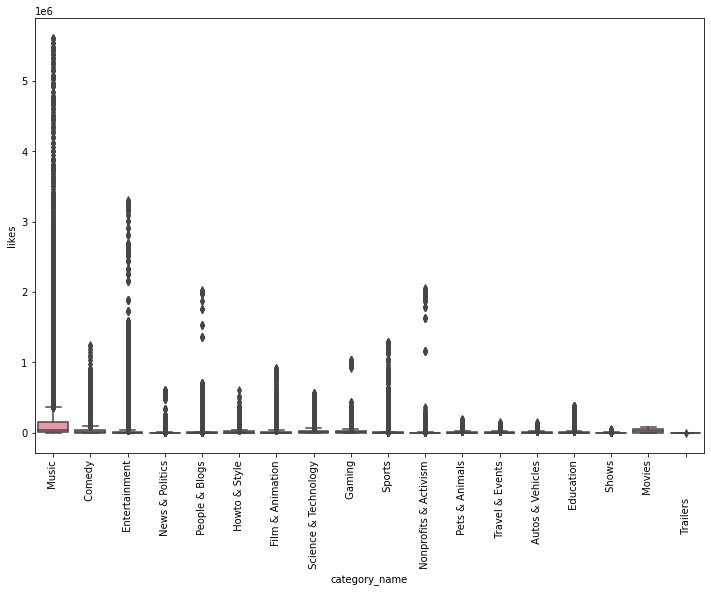

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name',y='likes',data=full_df)
plt.xticks(rotation='vertical')

## 6.. Find out whether audience is engaged or not

In [ ]:
full_df['like_rate'] = (full_df['likes'] / full_df['views']) * 100
full_df['dislike_rate'] = (full_df['dislikes'] / full_df['views']) * 100
full_df['comment_count_rate'] = (full_df['comment_count'] / full_df['views']) * 100
full_df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name,like_rate,dislike_rate,comment_count_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Comedy,4.575843,0.167292,0.256342


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

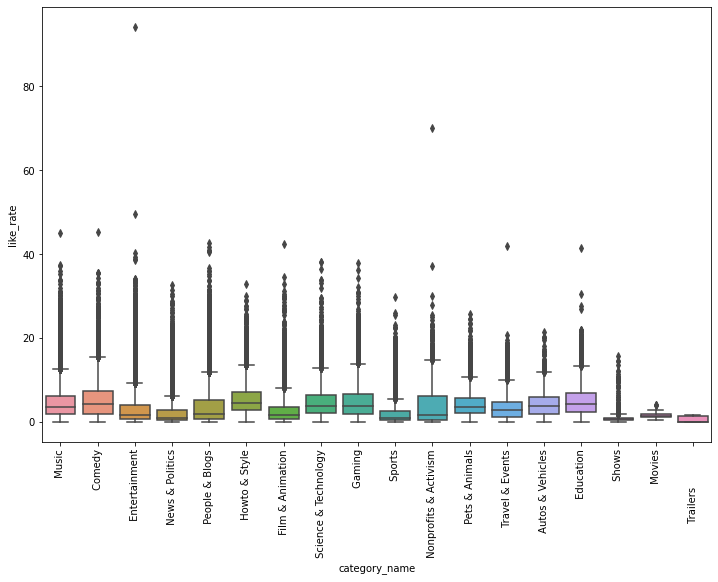

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name',y='like_rate',data=full_df)
plt.xticks(rotation='vertical')

## Analysing relationship between views & likes

<AxesSubplot:xlabel='views', ylabel='likes'>

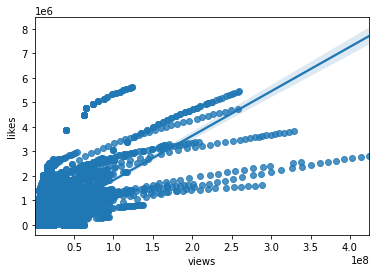

In [ ]:
sns.regplot(data=full_df,x='views',y='likes')

## Finding co-relation values between ['views', 'likes', 'dislikes']

<AxesSubplot:>

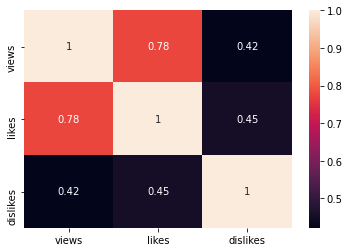

In [ ]:
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr(),annot=True)

In [ ]:
full_df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name,like_rate,dislike_rate,comment_count_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Comedy,4.575843,0.167292,0.256342


## 7. Which channels have the largest number of trending videos?

In [ ]:
cdf = full_df.groupby('channel_title')['video_id'].count().sort_values(ascending=False).to_frame().reset_index().rename(columns={'video_id':'total_videos'})
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,984
1,WWE,804
2,Late Night with Seth Meyers,773
3,VikatanTV,763
4,TheEllenShow,743
...,...,...
37819,LIGHTS - 001 jrny,1
37820,bangtanist,1
37821,LIGAMX Femenil,1
37822,LIGA COLOMBIANA OFICIAL,1


In [ ]:
import plotly.express as px

px.bar(data_frame=cdf[0:20], x='channel_title', y='total_videos')

## 8..Does Punctuations in title and tags have any relation with views, likes, dislikes comments?

In [ ]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def punc_count(x):
    return len([c for c in x if c in string.punctuation])
    
full_df['title'][0]

0          Eminem - Walk On Water (Audio) ft. BeyoncÃ©
0    Sing zu Ende! | Gesangseinlagen vom Feinsten |...
0             Malika LePen : Femme de Gauche - Trailer
0        John Lewis Christmas Ad 2017 - #MozTheMonster
0    Sharry Mann: Cute Munda ( Song Teaser) | Parmi...
0    é¸èªããªãåç´ã«è½ä¸ï¼è·¯ä¸ã®è»ã...
0             ì¢ì by ë¯¼ì_ì¤ì¢
ì _ì¢ë ëµê°
0                       CapÃ­tulo 12 | MasterChef 2017
0    ÐÐ°Ñ
Ð°Ñ Ð¸ ÐÐ¾Ð»Ð¸Ð½Ð° ÑÑÐ°ÑÑÑ ÑÐºÐ¾...
0                   WE WANT TO TALK ABOUT OUR MARRIAGE
Name: title, dtype: object

In [ ]:
text = 'Eminem - Walk On Water (Audio) ft. BeyoncÃ©'
punc_count(text)
sample=full_df[0:10000]
sample['count_punc']=sample['title'].apply(punc_count)
sample.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name,like_rate,dislike_rate,comment_count_rate,count_punc
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music,4.589104,0.253051,0.733639,4
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy,12.594873,0.166363,1.284185,1
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Comedy,4.575843,0.167292,0.256342,3
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,...,False,False,False,I know it's been a while since we did this sho...,CA,Entertainment,6.309630,0.094903,0.835851,3
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,...,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,Music,4.874563,0.062887,0.253752,3


<AxesSubplot:xlabel='count_punc', ylabel='views'>

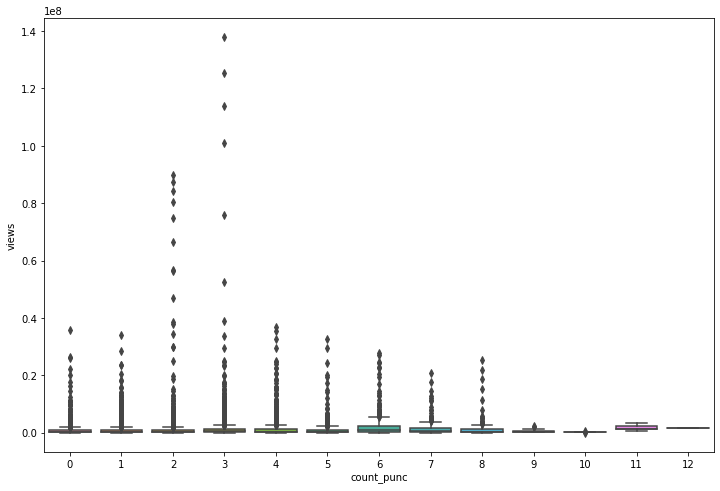

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='count_punc',y='views',data=sample)

In [ ]:
sample['count_punc'].corr(sample['views'])

0.06510009783044877